# Colour - HDRI - Examples: Variance Minimization Light Probe Sampling

Through this example, lights will be extracted from radiance images using Viriyothai (2009) variance minimization light probe sampling algorithm.

> Note: The current implementation is not entirely vectorised nor optimised thus slow.

In [1]:
%matplotlib inline

In [2]:
from __future__ import division

import numpy as np
import os
from pprint import pprint

import colour
from colour.plotting import *

from colour_hdri import (
    EXAMPLES_RESOURCES_DIRECTORY,
    light_probe_sampling_variance_minimization_Viriyothai2009)
from colour_hdri.sampling.variance_minimization import (
    find_regions_variance_minimization_Viriyothai2009,
    highlight_regions_variance_minimization)

colour.utilities.filter_warnings(True, False)

colour_plotting_defaults()

OETF = colour.OETFS['sRGB']

RESOURCES_DIRECTORY = os.path.join(EXAMPLES_RESOURCES_DIRECTORY,
                                   'radiance')

## Regions

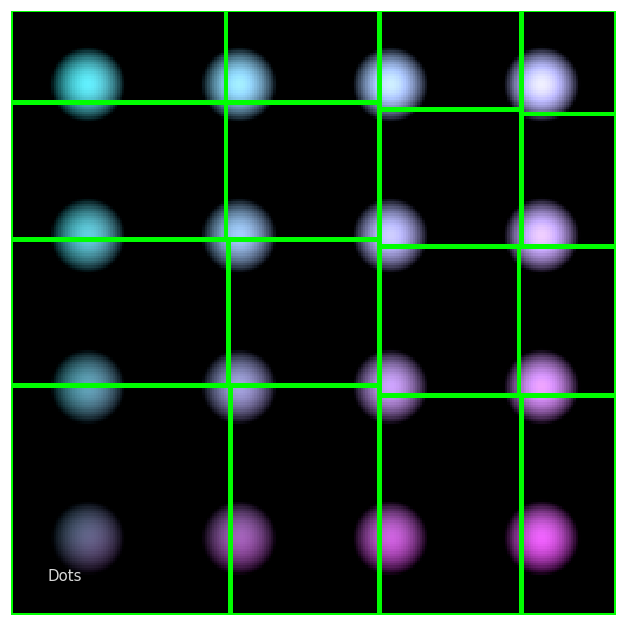

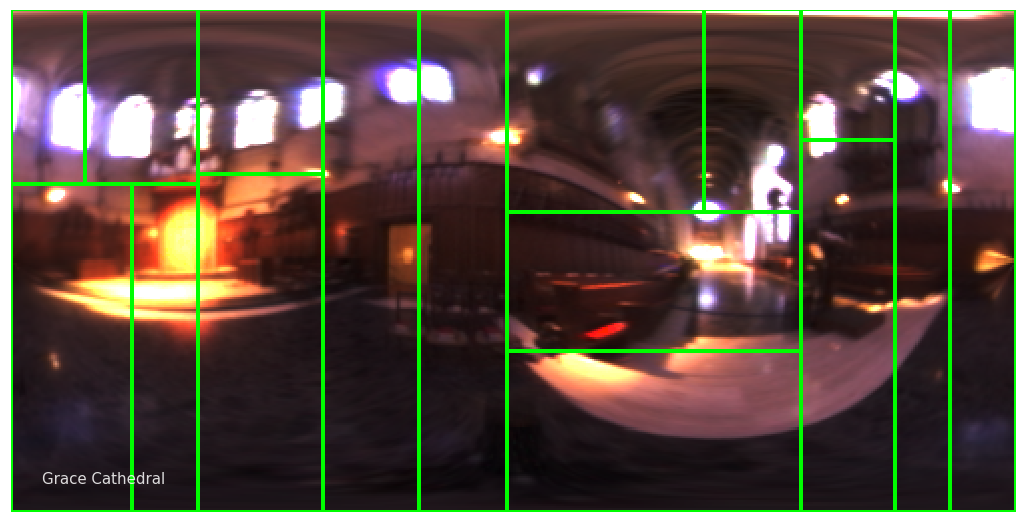

In [3]:
HDRI_IMAGE1 = colour.read_image(os.path.join(RESOURCES_DIRECTORY, 'Dots.exr'))

HDRI_IMAGE2 = colour.read_image(os.path.join(RESOURCES_DIRECTORY, 'Grace_Cathedral.hdr'))

Y1 = colour.RGB_luminance(
        HDRI_IMAGE1,
        colour.models.sRGB_COLOURSPACE.primaries,
        colour.models.sRGB_COLOURSPACE.whitepoint)
regions1 = find_regions_variance_minimization_Viriyothai2009(Y1)

Y2 = colour.RGB_luminance(
        HDRI_IMAGE2,
        colour.models.sRGB_COLOURSPACE.primaries,
    colour.models.sRGB_COLOURSPACE.whitepoint)
regions2 = find_regions_variance_minimization_Viriyothai2009(Y2)

image_plot(OETF(highlight_regions_variance_minimization(
            HDRI_IMAGE1,
            regions1)), 'Dots')

image_plot(OETF(highlight_regions_variance_minimization(
            HDRI_IMAGE2,
            regions2)), 'Grace Cathedral')

## Lights

In [4]:
print('Dots - 16 Lights')
pprint(light_probe_sampling_variance_minimization_Viriyothai2009(
           HDRI_IMAGE1, 16))

print('\n')

print('Grace Cathedral - 32 Lights')
pprint(light_probe_sampling_variance_minimization_Viriyothai2009(
           HDRI_IMAGE2, 32))

Dots - 16 Lights
[Light_Specification(uv=array([ 0.16015625,  0.11328125]), colour=array([  40.65992016,  226.11660475,  266.78098774]), index=array([29, 41])),
 Light_Specification(uv=array([ 0.15625   ,  0.32421875]), colour=array([  30.73776919,  130.37145448,  161.1077342 ]), index=array([83, 40])),
 Light_Specification(uv=array([ 0.4296875 ,  0.11328125]), colour=array([  98.10281688,  201.29676312,  299.4054991 ]), index=array([ 29, 110])),
 Light_Specification(uv=array([ 0.4296875,  0.3203125]), colour=array([  74.89445847,  117.00525796,  191.89859456]), index=array([ 82, 110])),
 Light_Specification(uv=array([ 0.16796875,  0.484375  ]), colour=array([  42.24291545,  125.58142895,  167.82099468]), index=array([124,  43])),
 Light_Specification(uv=array([ 0.43359375,  0.484375  ]), colour=array([  90.15780473,  102.82409275,  192.97436064]), index=array([124, 111])),
 Light_Specification(uv=array([ 0.18359375,  0.7421875 ]), colour=array([  82.1725328 ,   97.55175847,  179.72394